In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

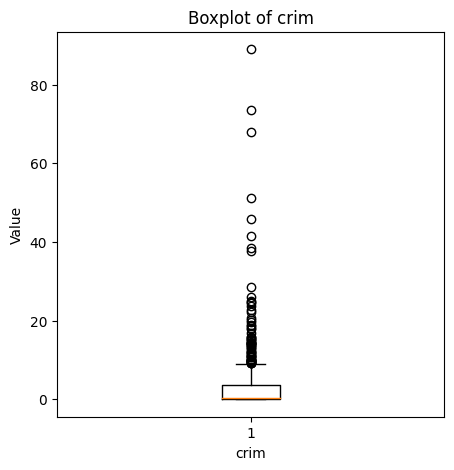

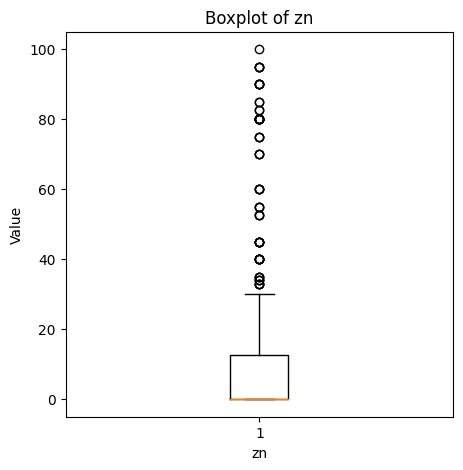

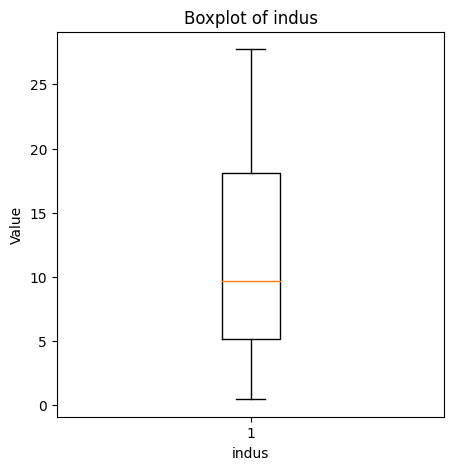

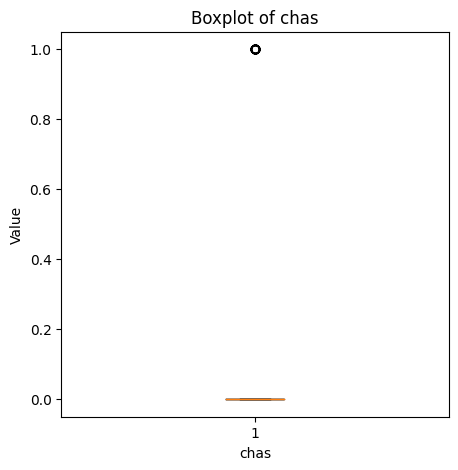

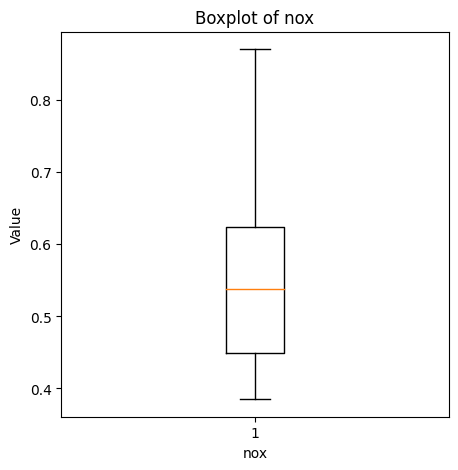

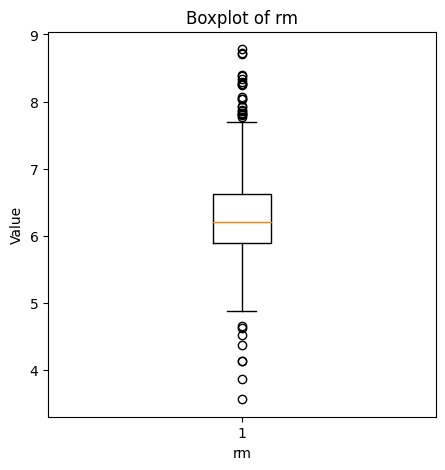

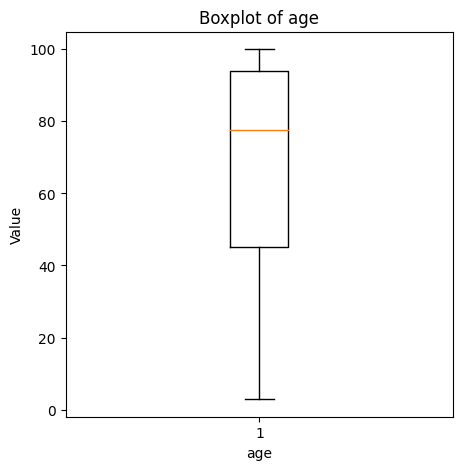

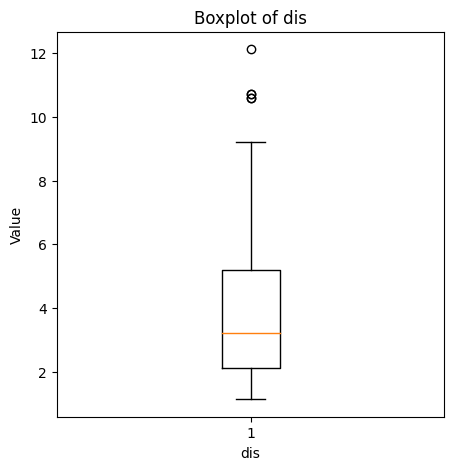

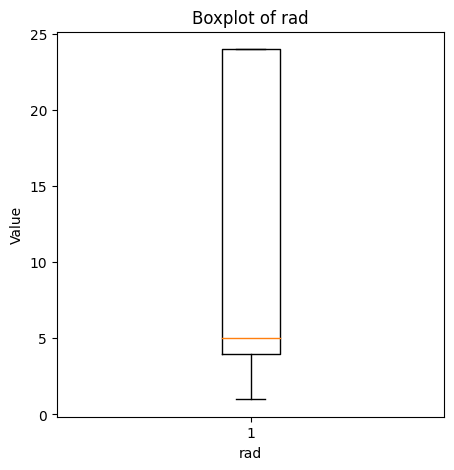

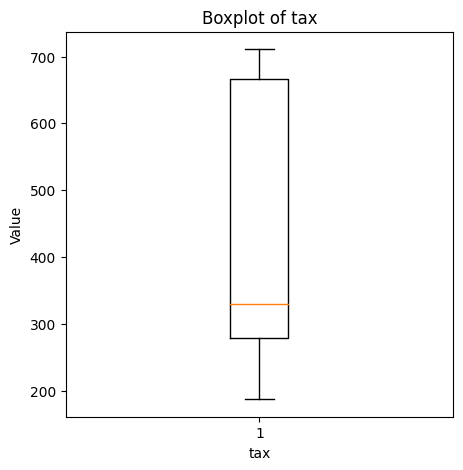

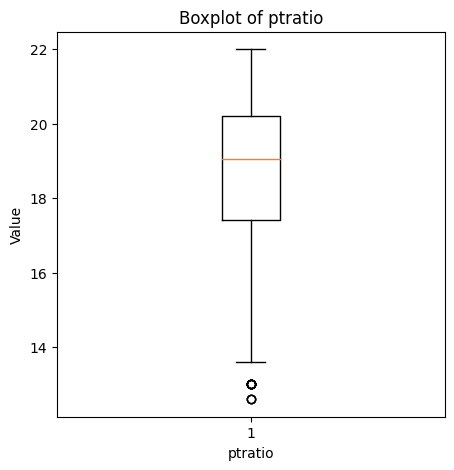

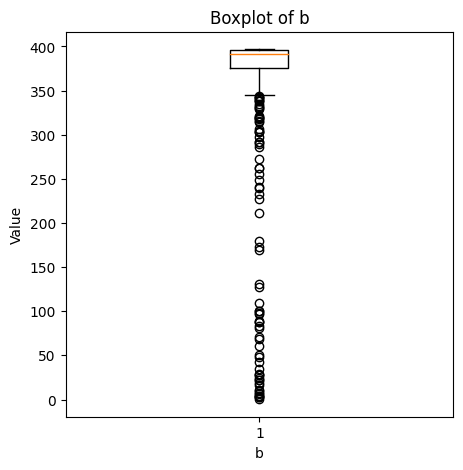

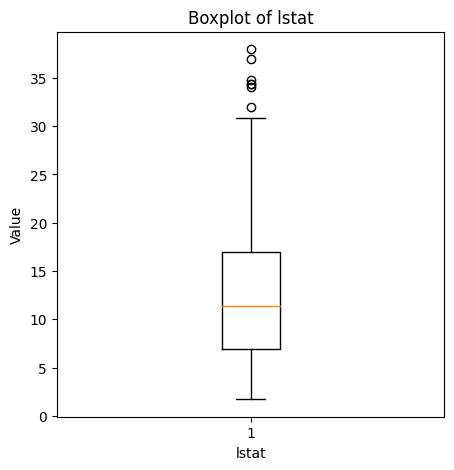

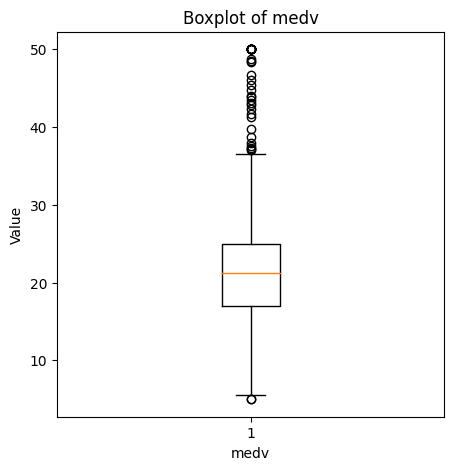

In [ ]:
# prompt: find outliers on all columns using boxplot

import matplotlib.pyplot as plt

for column in df:
  plt.figure(figsize=(5, 5))
  plt.boxplot(df[column])
  plt.xlabel(column)
  plt.ylabel("Value")
  plt.title("Boxplot of " + column)
  plt.show()


In [ ]:
# prompt: remove the outliers in all columns

import numpy as np
def remove_outliers(df, columns):
  for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])
  return df

df = remove_outliers(df, df.columns)
df.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,440.000000,438.000000,506.000000,471.0,506.000000,476.000000,506.000000,501.000000,506.000000,506.000000,491.000000,429.000000,499.000000,466.000000
mean,1.198341,3.192922,11.136779,0.0,0.554695,6.233212,68.574901,3.723699,9.549407,408.237154,18.624644,388.705711,12.340561,20.719099
std,2.128147,7.821441,6.860353,0.0,0.115878,0.533578,28.148861,1.989647,8.707259,168.537116,1.965453,11.180955,6.677641,6.451416
min,0.006320,0.000000,0.460000,0.0,0.385000,4.880000,2.900000,1.129600,1.000000,187.000000,13.600000,344.910000,1.730000,5.600000
25%,0.068962,0.000000,5.190000,0.0,0.449000,5.886500,45.025000,2.088200,4.000000,279.000000,17.400000,385.910000,6.910000,16.500000
50%,0.176440,0.000000,9.690000,0.0,0.538000,6.183500,77.500000,3.152300,5.000000,330.000000,19.100000,393.250000,11.250000,20.600000
75%,0.960870,0.000000,18.100000,0.0,0.624000,6.553000,94.075000,5.116700,24.000000,666.000000,20.200000,396.900000,16.550000,24.075000
max,8.982960,30.000000,27.740000,0.0,0.871000,7.691000,100.000000,9.222900,24.000000,711.000000,22.000000,396.900000,30.810000,36.500000


In [ ]:
df.fillna(df.mean(),inplace=True)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
y=df.iloc[:,-1:]
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
X=df[["crim","zn","indus","nox","rm","age","dis","rad","tax","ptratio","b","lstat"]]
X

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train

array([[-0.50874768,  2.45482621, -0.74491444, ...,  0.21070002,
         0.02092383,  0.90455947],
       [-0.55375958,  2.85241501, -0.84901832, ...,  0.52642726,
         0.80400106, -0.45354337],
       [-0.55303877, -0.03766829, -0.66648002, ..., -0.57861808,
         0.03301769, -0.91947259],
       ...,
       [-0.52937494, -0.46082502, -0.15309105, ..., -0.47337567,
         0.56313174, -0.29480408],
       [-0.48935243, -0.46082502, -0.59517599, ..., -0.42075446,
         0.38474736,  0.95453295],
       [-0.53542764, -0.46082502, -1.003035  , ..., -1.10483014,
         0.80400106,  0.35044175]])

In [ ]:
reg=LinearRegression().fit(x_train,y_train)
reg.score(x_test,y_test)

0.5244987121007152

In [ ]:
y_pred=reg.predict(x_test)
y_pred

array([[25.5436159 ],
       [18.50688854],
       [23.73258242],
       [11.00648667],
       [21.62321046],
       [21.54896282],
       [17.91578223],
       [22.77404018],
       [19.73315477],
       [22.02606085],
       [12.98938276],
       [15.79226837],
       [16.17349736],
       [11.26879234],
       [25.76283742],
       [30.17164904],
       [19.29279215],
       [29.56821832],
       [28.29115428],
       [23.11221586],
       [25.0836242 ],
       [21.34123316],
       [19.95552454],
       [27.21859503],
       [22.90327777],
       [16.8651051 ],
       [19.47862056],
       [18.14637833],
       [26.19664367],
       [18.68365805],
       [15.06507119],
       [16.50839115],
       [21.59538861],
       [22.2651586 ],
       [25.18949667],
       [15.43256685],
       [10.86150174],
       [19.15268766],
       [17.51843428],
       [13.78539536],
       [25.23688371],
       [21.92210497],
       [23.65402652],
       [13.82663338],
       [24.49860412],
       [24

In [ ]:
y_test

,medv
329,22.600000
371,20.719099
219,23.000000
403,8.300000
78,21.200000
...,...
49,19.400000
498,21.200000
309,20.300000
124,18.800000


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test,y_pred)

14.25794774963956

In [ ]:
r2_score(y_test,y_pred)

0.524498712100715